In [1]:
# Importación de librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Lectura y limpieza de los datos.
price_california = pd.read_csv("housing.csv")
print(price_california.head())
print(price_california.info())
print(price_california.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [5]:
# Borrar datos faltantes y valores duplicados.
price_california = price_california.dropna()
price_california = price_california.drop_duplicates()
price_california.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


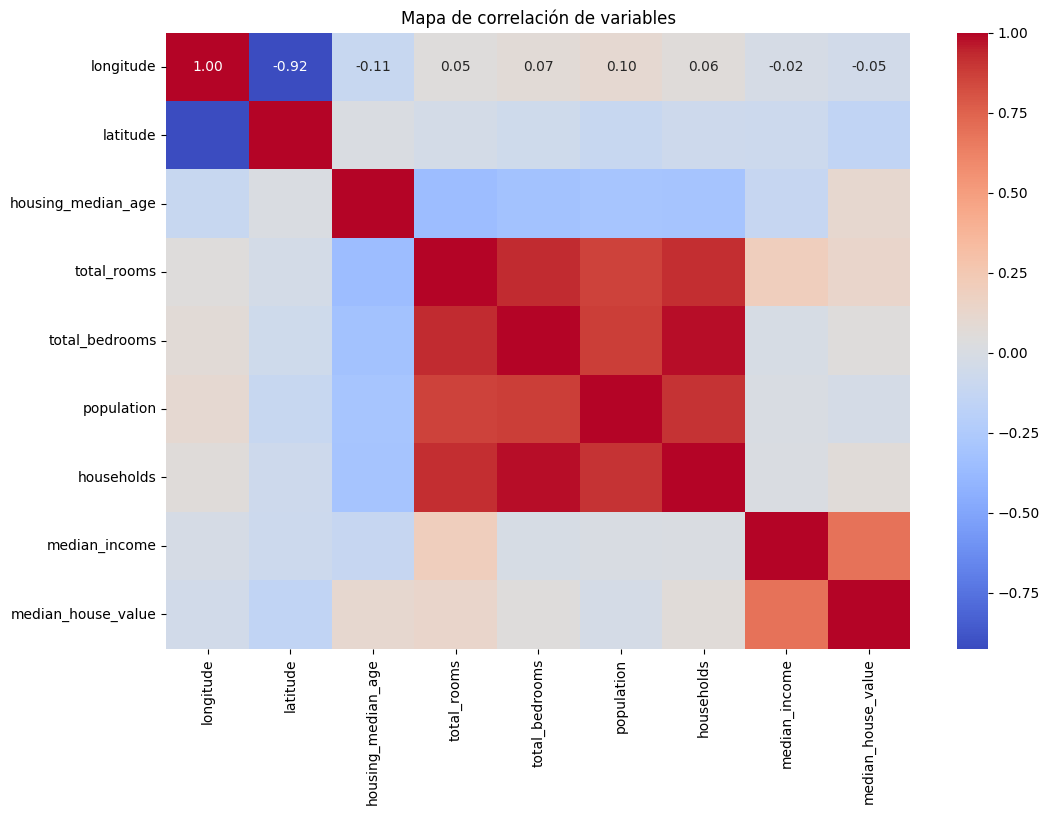

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

C:\Users\enriq\AppData\Local\Temp\ipykernel_13404\165418911.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(price_california.corr())


In [7]:
# Dibujamos e imprimimos la correlación entre variables.
plt.figure(figsize=(12, 8))
corr_matrix = price_california.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación de variables")
plt.show()
print(price_california.corr())

Text(0.5, 1.0, 'Relationship Between Ocean Proximity and Value of Houses')

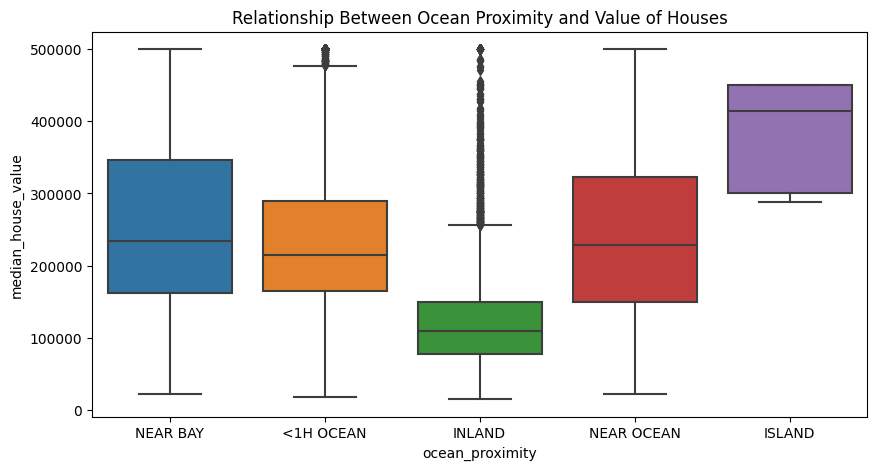

In [9]:
# Vemos la relación entre algunas variables como el valor de las casas y la cercanía al océano.
plt.figure(figsize=(10, 5))
sns.boxplot(x=price_california['ocean_proximity'], y=price_california['median_house_value'])
plt.title('Relationship Between Ocean Proximity and Value of Houses')

In [11]:
# Convertimos a binario la variable categórica (Sólo ejecutar una vez)
price_california = pd.get_dummies(price_california, columns=['ocean_proximity'], drop_first=True, dtype=int)

Text(0.5, 1.0, 'Correlation Between Columns')

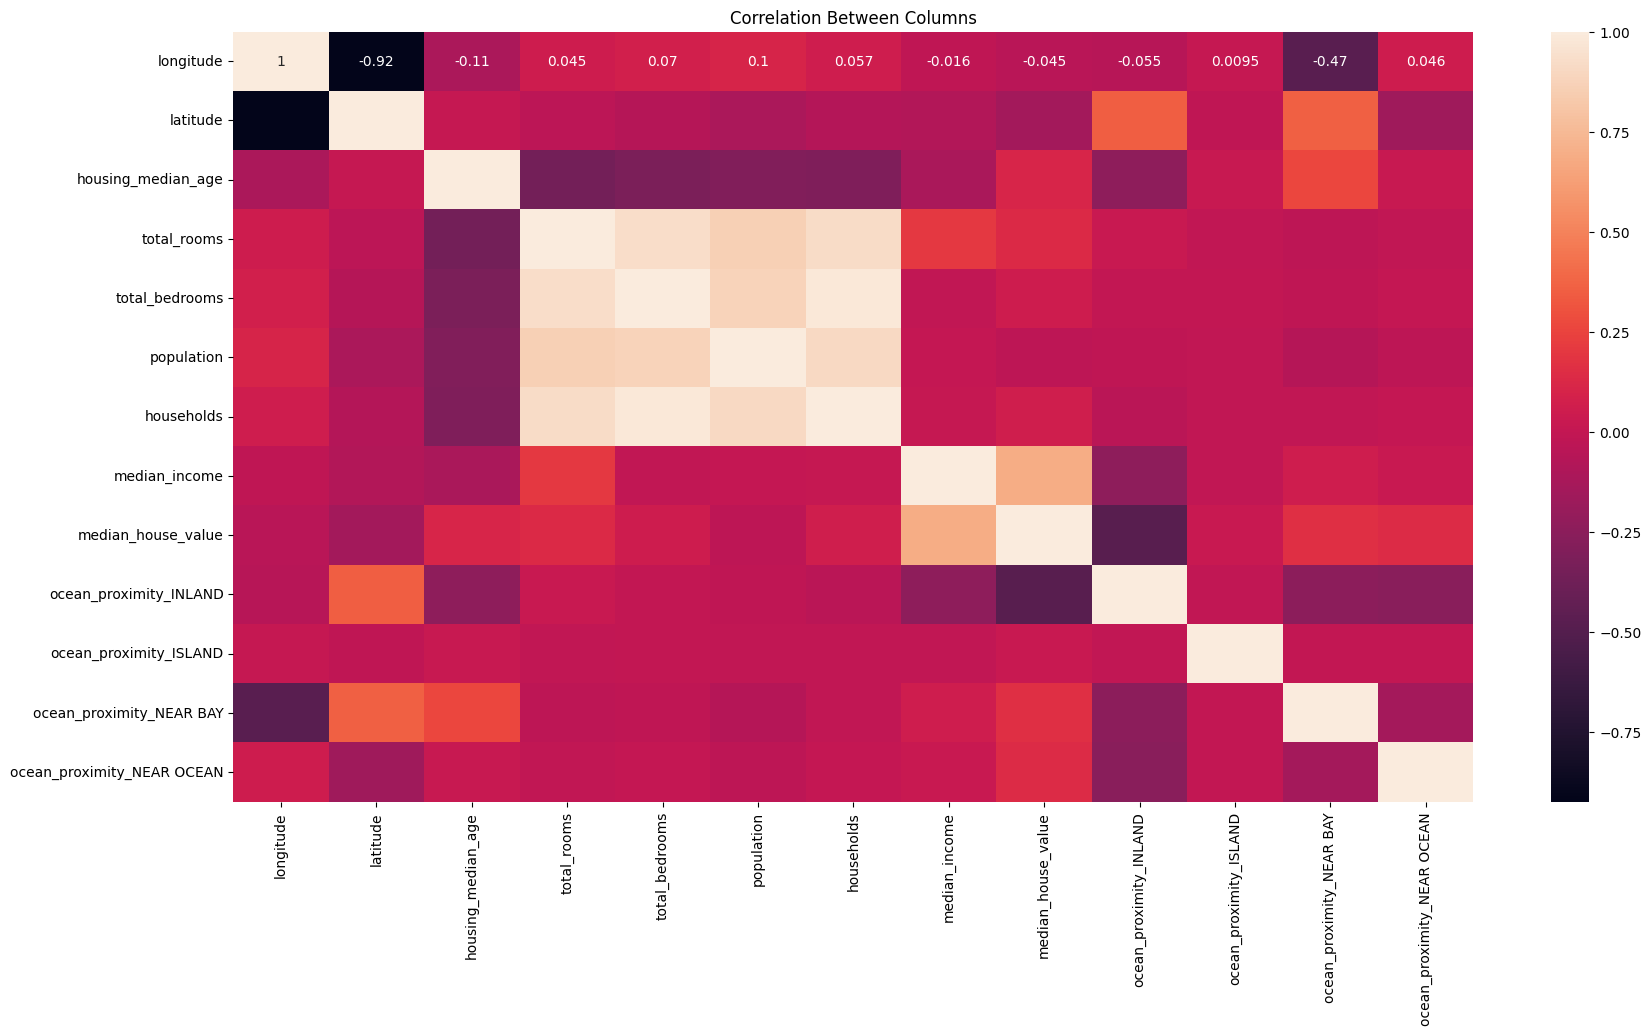

In [13]:
# Recalculamos la correlación
corr = price_california.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)

plt.title('Correlation Between Columns')

In [15]:
# Generamos el modelo.
y = price_california['median_house_value']
X = price_california.drop('median_house_value', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
lr = LinearRegression()
model = lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
# Measure model training and testing scores
print(f"Model train score: {model.score(X_train, y_train)}")
print(f"Model test score: {model.score(X_test, y_test)}")

Model train score: 0.6499669670666068
Model test score: 0.6316963390879776


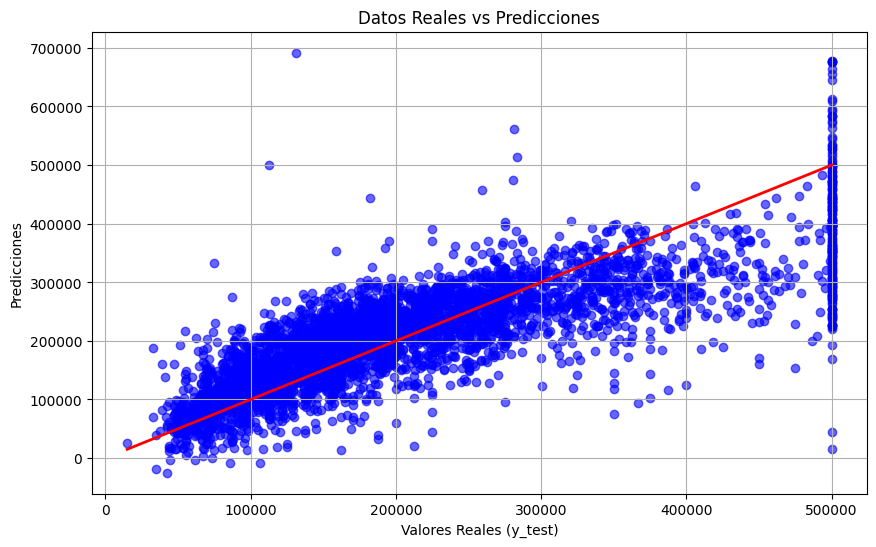

In [17]:
# Graficación de resultados.
import matplotlib.pyplot as plt
# Graficar los datos reales vs las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prediction, alpha=0.6, color='blue')  # Puntos reales vs predicción
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Línea ideal
plt.title("Datos Reales vs Predicciones")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()